In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
        
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
                
    return arr

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    
    return X / np.expand_dims(l2, axis)

# отображение графика на первых count_record записях
def show_graph(y_predict, y_true, count_record):
    plt.figure(figsize = (16,5))
    plt.plot(y_predict[:count_record,1], 'r',label = 'Y new')
    plt.plot(y_true[:count_record,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.grid()
    plt.show()

# отображение метрики    
def get_accuracy(y_predict, y_true):
    result_error = y_true - y_predict
    error = np.mean(np.abs(result_error))
    
    return (1 - error) * 100

In [3]:
class IrisNN:
    def __init__(self, neuron_numb, learning_rate):
        np.random.seed(1)
        
        self.w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
        self.w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
        
        self.learning_rate = learning_rate
        self.errors = []
    
    # вычисление сигмоид функции
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    # вычисление производной от сигмоид функции
    @staticmethod
    def sigmoid_deriv(x):
        return x * (1 - x)
    
    def showError(self):
        # черчение диаграммы точности в зависимости от обучения
        plt.figure(figsize = (16,5))
        plt.plot(self.errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.grid()
        plt.show()
    
    # предсказание
    def predict(self, inputs):
        self.layers = []
        
        # прямое распространение(feed forward)
        layer1 = IrisNN.sigmoid(np.dot(inputs, self.w0))
        layer2 = IrisNN.sigmoid(np.dot(layer1, self.w1))
        
        self.layers.append(layer1)
        self.layers.append(layer2)
        
        return layer2
    
    # тренировка 
    def fit(self, training_inputs, training_outputs, training_iterations):
        for iteration in range(training_iterations):
            self.predict(training_inputs)

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y_train - self.layers[1]  
            # производная функции потерь = производная квадратичных потерь
            layer2_delta = layer2_error * IrisNN.sigmoid_deriv(self.layers[1])
            
            layer1_error = layer2_delta.dot(self.w1.T)
            layer1_delta = layer1_error * IrisNN.sigmoid_deriv(self.layers[0])
            
            # коррекция
            self.w1 += self.layers[0].T.dot(layer2_delta) * self.learning_rate
            self.w0 += training_inputs.T.dot(layer1_delta) * self.learning_rate
            
            # метрика модели
            error = np.mean(np.abs(layer2_error))
            self.errors.append(error)
            
            self.accuracy = (1 - error) * 100

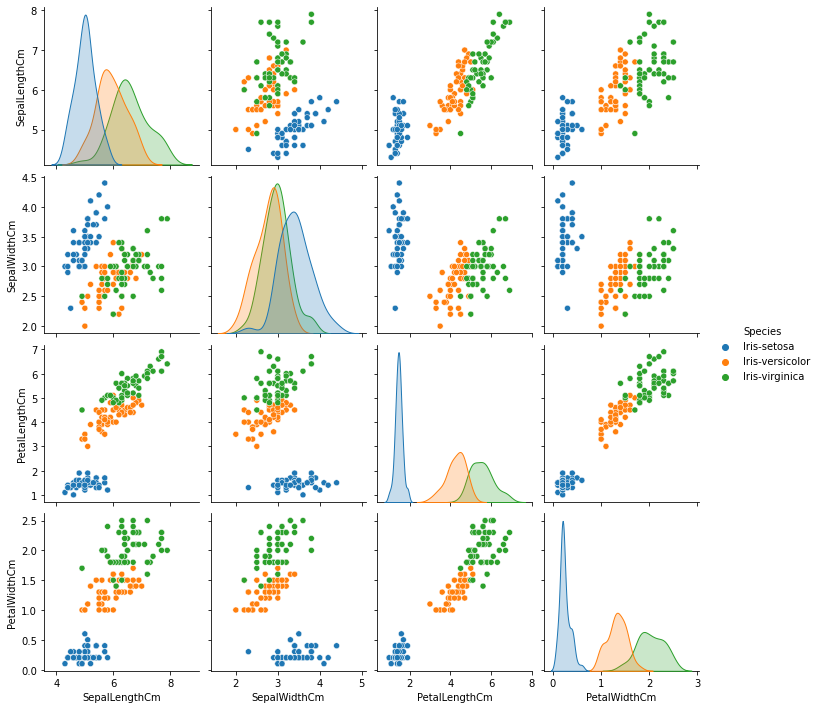

In [4]:
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [5]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [6]:
# определим число нейронов скрытого слоя
neuron_numb = 2

# скорость обучения
learning_rate = 0.05

irisNN = IrisNN(neuron_numb, learning_rate)

irisNN.fit(X_train, y_train, 10000)

In [7]:
y_predict = irisNN.predict(X_train)
y_predict

array([[9.50307383e-01, 1.12702190e-14, 1.20379445e-01],
       [4.53888954e-10, 9.83484046e-01, 1.53454418e-01],
       [2.15608872e-01, 2.39006341e-02, 4.05851338e-01],
       [1.95853807e-01, 2.80123163e-02, 4.05913687e-01],
       [7.58732957e-05, 6.65242275e-01, 3.03302011e-01],
       [9.54208563e-01, 4.44577997e-15, 1.14415665e-01],
       [1.20210674e-01, 5.15930021e-02, 4.03777934e-01],
       [4.42961692e-08, 9.45488793e-01, 2.02665133e-01],
       [1.37856234e-01, 4.30575170e-02, 4.04070042e-01],
       [1.61450979e-10, 9.88184826e-01, 1.44338346e-01],
       [1.58911892e-07, 9.24882567e-01, 2.18341354e-01],
       [2.47217919e-01, 2.20601974e-02, 4.08440950e-01],
       [1.76082220e-01, 3.21527059e-02, 4.05404303e-01],
       [6.96128895e-10, 9.82089155e-01, 1.57905102e-01],
       [9.54752045e-01, 3.87873742e-15, 1.13562049e-01],
       [6.99241731e-09, 9.68064658e-01, 1.82181102e-01],
       [9.50876355e-01, 9.88733754e-15, 1.19524531e-01],
       [2.07841932e-02, 1.17576

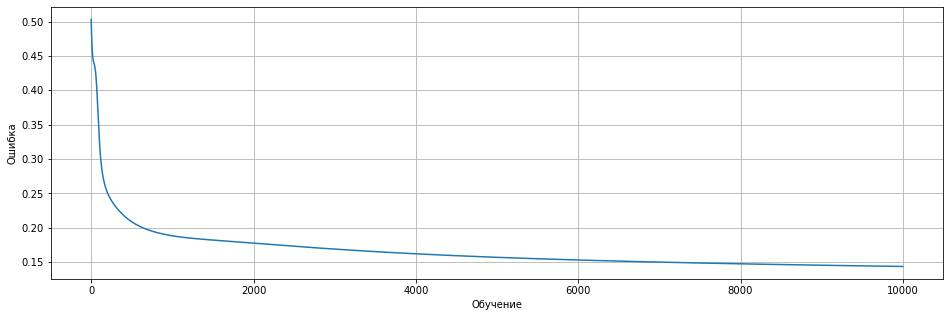

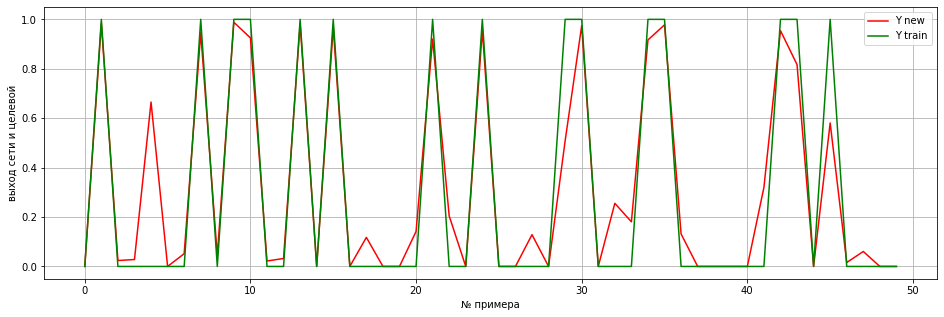

Аккуратность нейронной сети 85.65%


In [8]:
irisNN.showError()

show_graph(y_predict, y_train, 50)
accuracy = get_accuracy(y_predict, y_train)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

In [9]:
y_predict = irisNN.predict(X_test)
y_predict

array([[1.68245562e-06, 8.50131877e-01, 2.47673162e-01],
       [2.63879950e-01, 1.67272822e-02, 4.05604566e-01],
       [9.80397657e-07, 8.64897547e-01, 2.40007464e-01],
       [9.46812879e-01, 2.45601706e-14, 1.25580777e-01],
       [1.55411783e-06, 8.55929462e-01, 2.46909555e-01],
       [9.47585978e-01, 2.06599864e-14, 1.24405216e-01],
       [1.65060062e-04, 5.83389552e-01, 3.13421077e-01],
       [1.19228296e-05, 7.26396193e-01, 2.72317970e-01],
       [1.20169416e-01, 4.93105205e-02, 4.02961304e-01],
       [2.88569237e-08, 9.46299096e-01, 1.96493079e-01],
       [3.93136506e-02, 7.78416908e-02, 3.84465491e-01],
       [9.47963358e-01, 1.90579422e-14, 1.23863872e-01],
       [2.67048396e-07, 8.90594367e-01, 2.21601669e-01],
       [5.93059113e-03, 1.83408871e-01, 3.58858232e-01],
       [5.60303866e-08, 9.45375641e-01, 2.06185292e-01],
       [4.84698262e-01, 2.51471045e-03, 3.94799462e-01],
       [9.52930276e-01, 6.08180496e-15, 1.16395757e-01],
       [6.64782702e-02, 7.24903

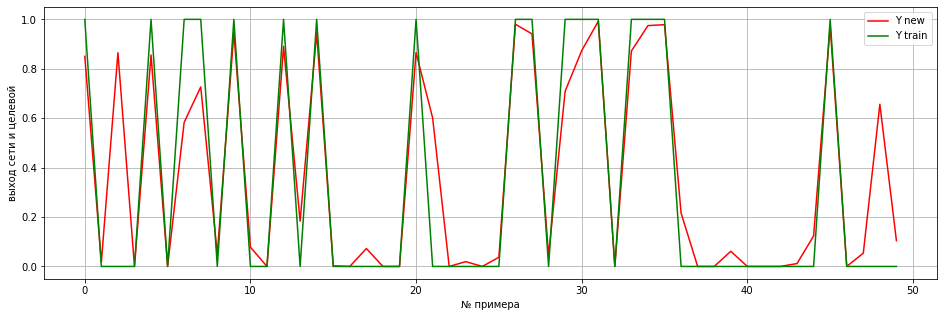

Аккуратность нейронной сети 83.57%


In [10]:
show_graph(y_predict, y_test, 50)
accuracy = get_accuracy(y_predict, y_test)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Весь процесс обучения и предсказания завернули в класс и написаны функции для отображения графика и метрики.
Теперь можно протестировать как будет проходить обучение на разных глобальных параметрах

In [11]:
%%time

neuron_numbs = [2, 5, 10] 
learning_rates = [0.001, 0.01, 0.05, 0.1]
count_epoсhs = [1000, 5000, 10000, 20000]

best_accuracy = 0
best_param = {}

# сюда будем собирать аналитику качества по каждому параметру при одинаковых других параметрах 
analytics = {"neuron_numbs": {}, "learning_rates": {}, "count_epoсhs": {}}

for neuron_numb in neuron_numbs:
    for learning_rate in learning_rates:
        for count_epoсh in count_epoсhs:
            print("//--------------------------------------------//")
            print(f"Количество нейронов на внутренем слое: {neuron_numb}")
            print(f"Точность обучения: {learning_rate}")
            print(f"Количество эпох: {count_epoсh}")
            print()
            irisNN = IrisNN(neuron_numb, learning_rate)
            irisNN.fit(X_train, y_train, count_epoсh)
            
            #смотреть качество будем на тестовом наборе
            y_predict = irisNN.predict(X_test)
            accuracy = get_accuracy(y_predict, y_test)
            print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
            print("//--------------------------------------------//")
            
            if best_accuracy < accuracy:
                best_accuracy = accuracy
                best_param["neuron_numb"] = neuron_numb
                best_param["learning_rate"] = learning_rate
                best_param["count_epoсh"] = count_epoсh
            
            # собираем аналитику
            key_for_neuron_numb = f"{learning_rate}-{count_epoсh}"
            key_for_learning_rate = f"{neuron_numb}-{count_epoсh}"
            key_for_count_epoch = f"{learning_rate}-{neuron_numb}"
            
            if key_for_neuron_numb not in analytics["neuron_numbs"]:
                analytics["neuron_numbs"][key_for_neuron_numb] = {
                    "params": {"learning_rate": learning_rate, "count_epoсh": count_epoсh},
                    "accuracies": []
                }
            
            if key_for_learning_rate not in analytics["learning_rates"]:
                analytics["learning_rates"][key_for_learning_rate] = {
                    "params": {"neuron_numb": neuron_numb, "count_epoсh": count_epoсh},
                    "accuracies": []
                }
                
            if key_for_count_epoch not in analytics["count_epoсhs"]:
                analytics["count_epoсhs"][key_for_count_epoch] = {
                    "params": {"learning_rate": learning_rate, "neuron_numb": neuron_numb},
                    "accuracies": []
                }
            
            analytics["neuron_numbs"][key_for_neuron_numb]["accuracies"].append(accuracy)
            analytics["learning_rates"][key_for_learning_rate]["accuracies"].append(accuracy)
            analytics["count_epoсhs"][key_for_count_epoch]["accuracies"].append(accuracy)

//--------------------------------------------//
Количество нейронов на внутренем слое: 2
Точность обучения: 0.001
Количество эпох: 1000

Аккуратность нейронной сети 54.96%
//--------------------------------------------//
//--------------------------------------------//
Количество нейронов на внутренем слое: 2
Точность обучения: 0.001
Количество эпох: 5000

Аккуратность нейронной сети 66.15%
//--------------------------------------------//
//--------------------------------------------//
Количество нейронов на внутренем слое: 2
Точность обучения: 0.001
Количество эпох: 10000

Аккуратность нейронной сети 73.41%
//--------------------------------------------//
//--------------------------------------------//
Количество нейронов на внутренем слое: 2
Точность обучения: 0.001
Количество эпох: 20000

Аккуратность нейронной сети 76.68%
//--------------------------------------------//
//--------------------------------------------//
Количество нейронов на внутренем слое: 2
Точность обучения: 0

Аккуратность нейронной сети 90.01%
//--------------------------------------------//
//--------------------------------------------//
Количество нейронов на внутренем слое: 10
Точность обучения: 0.01
Количество эпох: 10000

Аккуратность нейронной сети 93.41%
//--------------------------------------------//
//--------------------------------------------//
Количество нейронов на внутренем слое: 10
Точность обучения: 0.01
Количество эпох: 20000

Аккуратность нейронной сети 94.82%
//--------------------------------------------//
//--------------------------------------------//
Количество нейронов на внутренем слое: 10
Точность обучения: 0.05
Количество эпох: 1000

Аккуратность нейронной сети 90.01%
//--------------------------------------------//
//--------------------------------------------//
Количество нейронов на внутренем слое: 10
Точность обучения: 0.05
Количество эпох: 5000

Аккуратность нейронной сети 95.1%
//--------------------------------------------//
//-------------------------

In [12]:
analytics

{'neuron_numbs': {'0.001-1000': {'params': {'learning_rate': 0.001,
    'count_epoсh': 1000},
   'accuracies': [54.96366855848795, 56.18330850457291, 57.09745972212136]},
  '0.001-5000': {'params': {'learning_rate': 0.001, 'count_epoсh': 5000},
   'accuracies': [66.15406055699174, 70.00311743376915, 71.3420665020327]},
  '0.001-10000': {'params': {'learning_rate': 0.001, 'count_epoсh': 10000},
   'accuracies': [73.4102057449839, 74.76421899123515, 75.51840796033513]},
  '0.001-20000': {'params': {'learning_rate': 0.001, 'count_epoсh': 20000},
   'accuracies': [76.68266052077325, 78.3787278347599, 79.32573935559768]},
  '0.01-1000': {'params': {'learning_rate': 0.01, 'count_epoсh': 1000},
   'accuracies': [73.4082019761793, 74.76367160303333, 75.51929034430404]},
  '0.01-5000': {'params': {'learning_rate': 0.01, 'count_epoсh': 5000},
   'accuracies': [79.56141146692569, 88.97297392237432, 90.01191730203895]},
  '0.01-10000': {'params': {'learning_rate': 0.01, 'count_epoсh': 10000},
   '

In [13]:
def show_graph_by_accuracy(accaracies, x_params, x_label, title):
    plt.figure(figsize = (8,5))
    plt.plot(x_params, accaracies)
    plt.xlabel(x_label)
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.grid()
    plt.show()

**Расмотрим как меняется качество в зависимости от количества нейронов на скрытом слое**

Каждый график показывает это изминение при разных мараметрах обучения и количества эпох

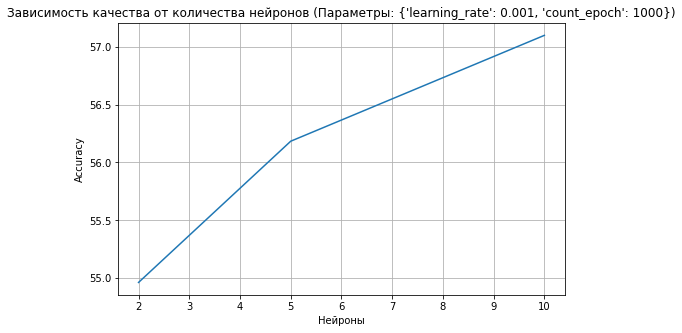

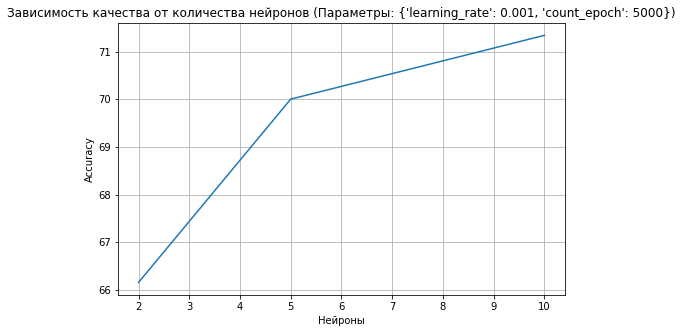

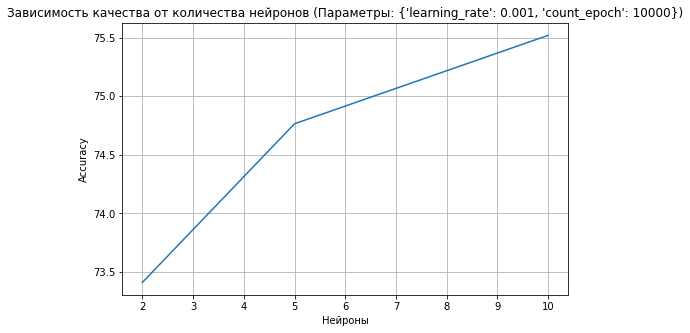

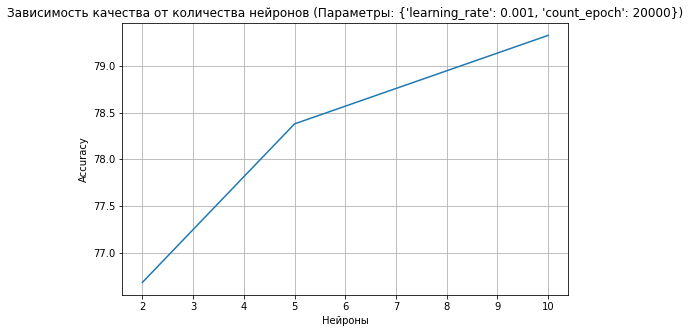

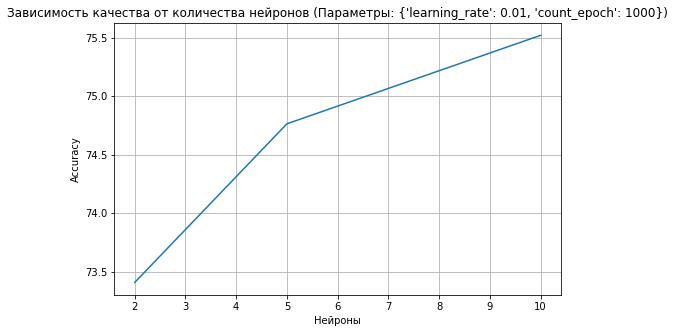

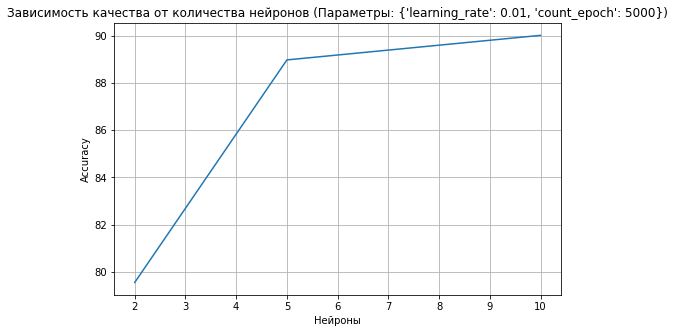

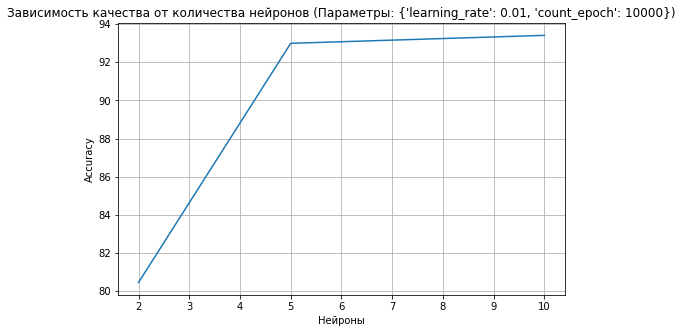

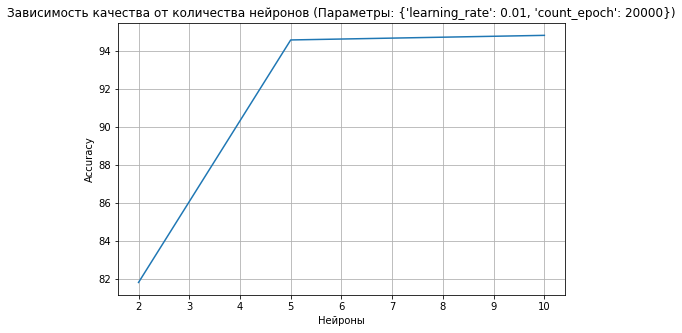

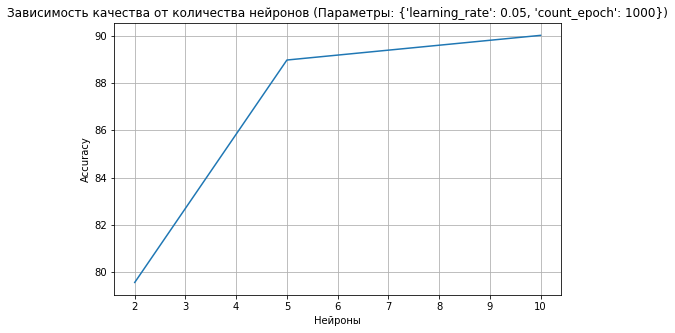

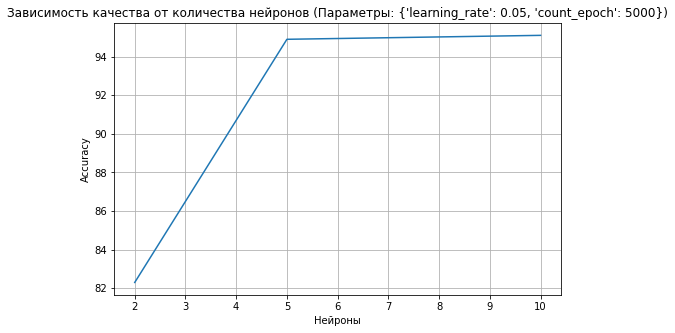

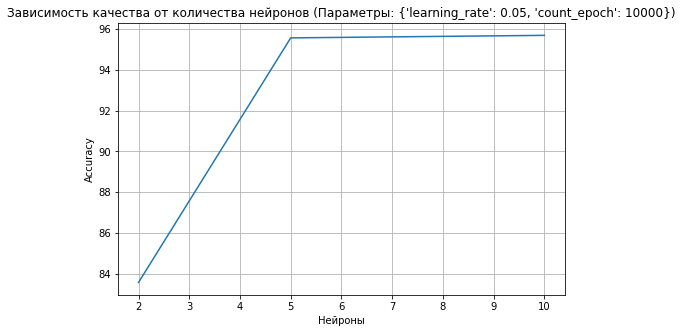

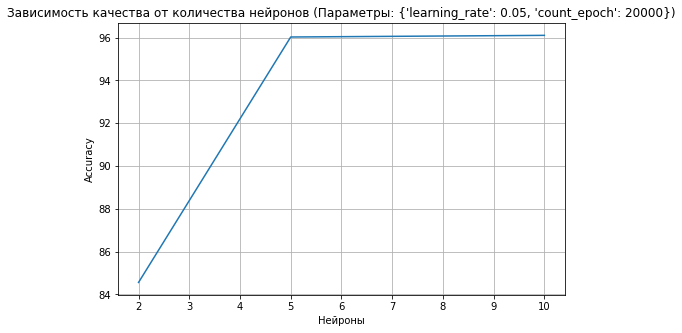

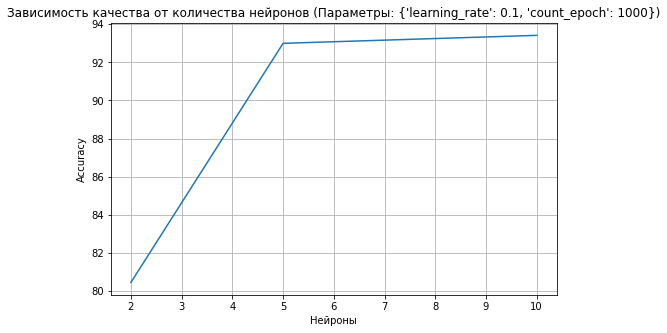

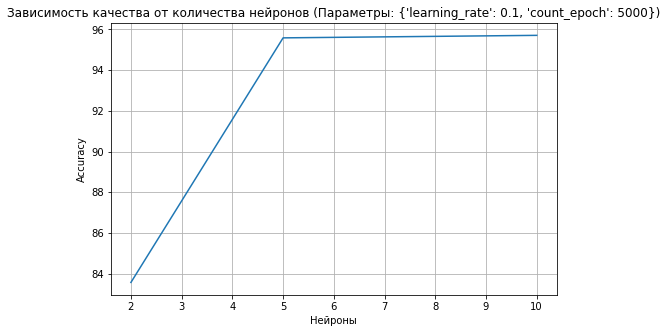

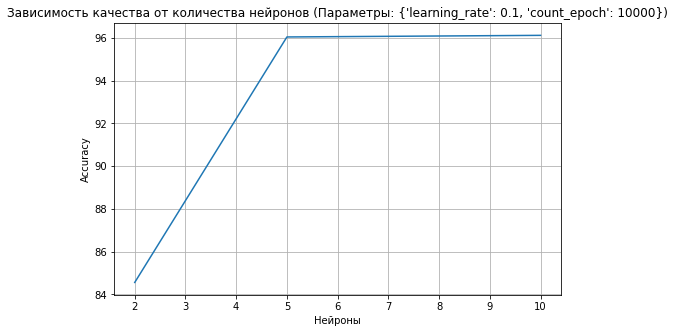

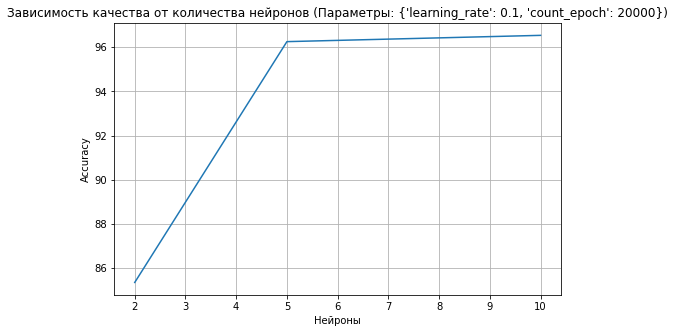

In [14]:
for key in analytics["neuron_numbs"]:
    neuron_numb_analitic = analytics["neuron_numbs"][key]
    accuracies = neuron_numb_analitic["accuracies"]
    params = neuron_numb_analitic["params"]
    
    show_graph_by_accuracy(
        accuracies, 
        neuron_numbs, 
        "Нейроны", 
        f"Зависимость качества от количества нейронов (Параметры: {params})"
    )

Анализируя грфики можно увидеть что в основном чем больше нейронов - тем качество выше, но в некоторых случаях оно вырастает не значительно

**Теперь расмотрим как меняется качество в зависимости от точности обучения**

Каждый график показывает это изминение при разных мараметрах количества нейронов и количества эпох

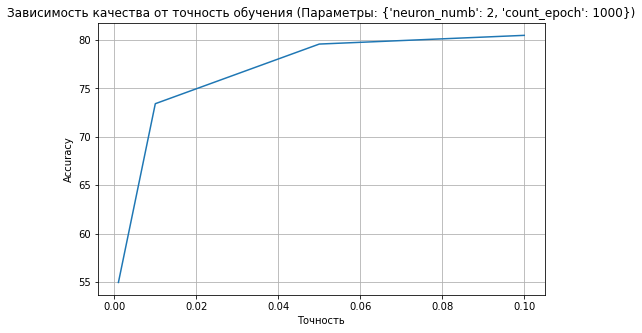

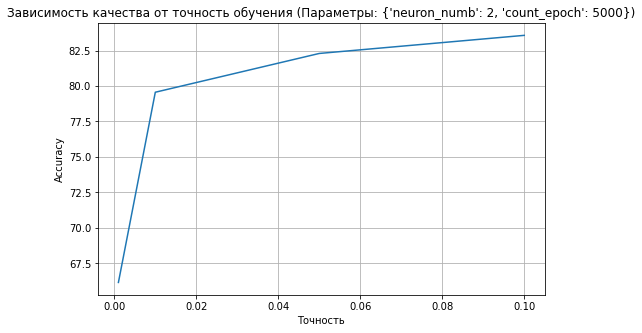

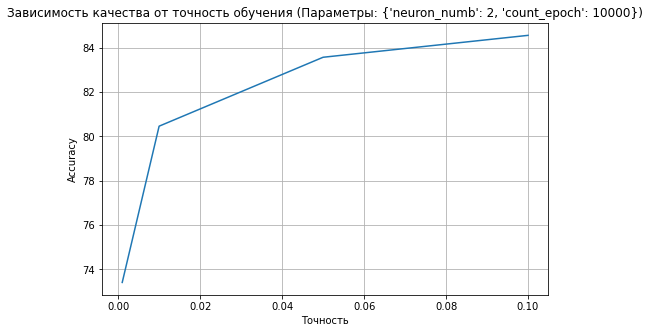

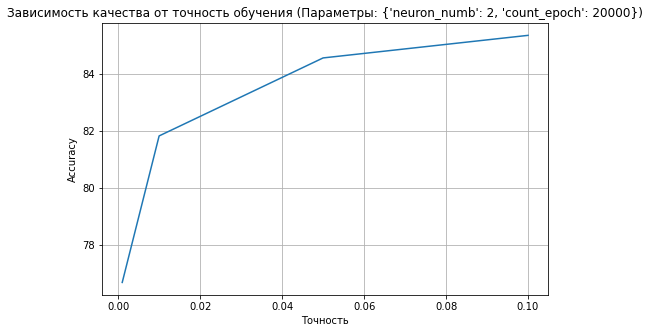

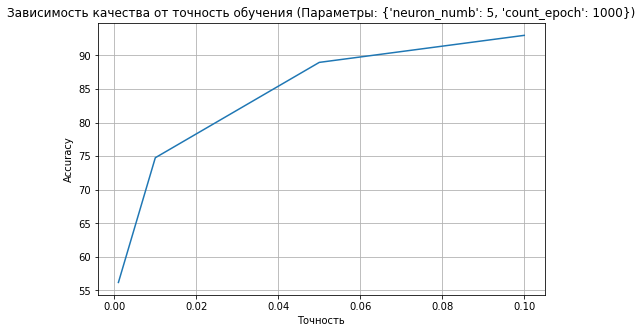

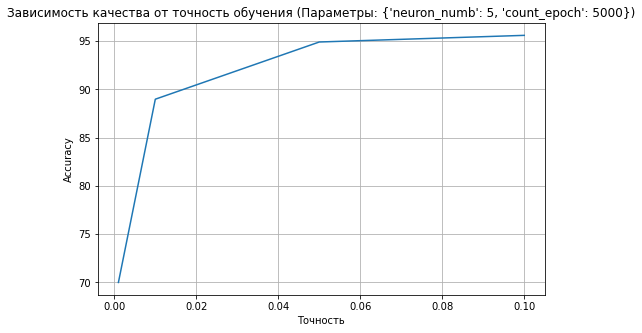

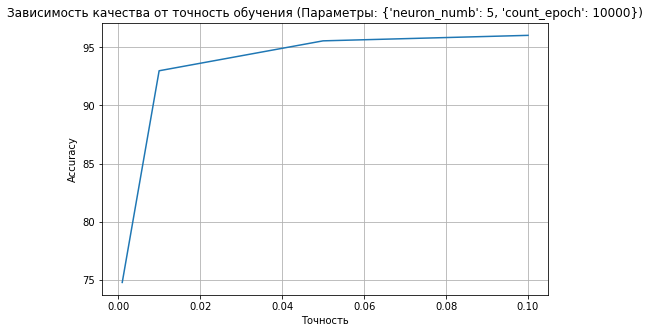

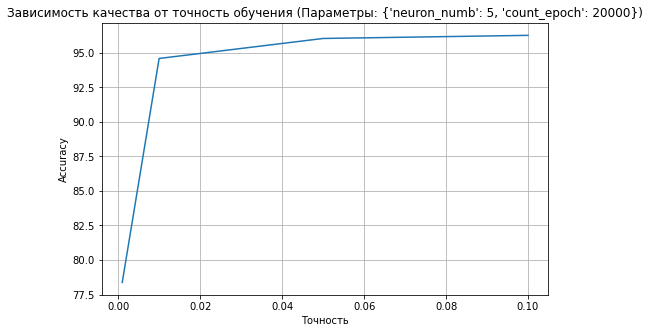

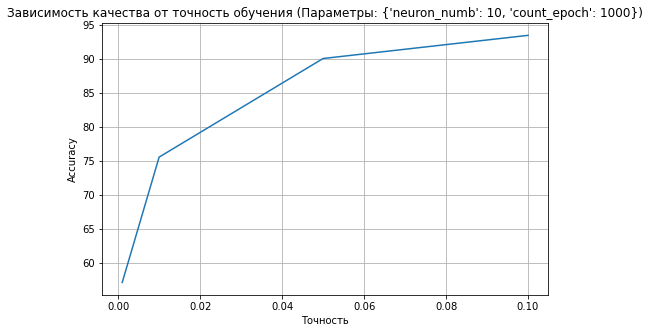

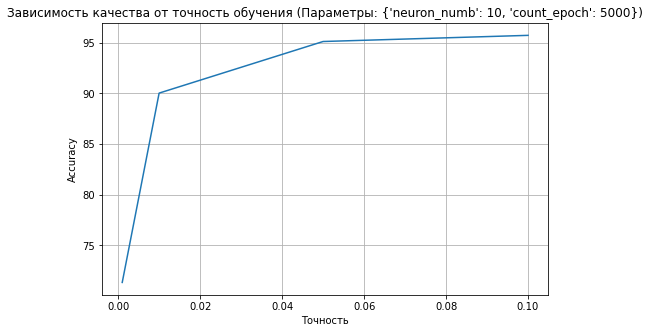

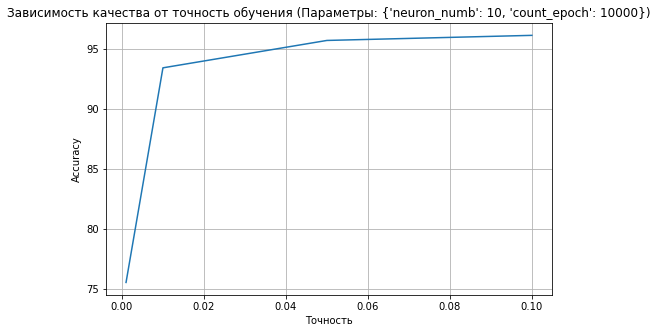

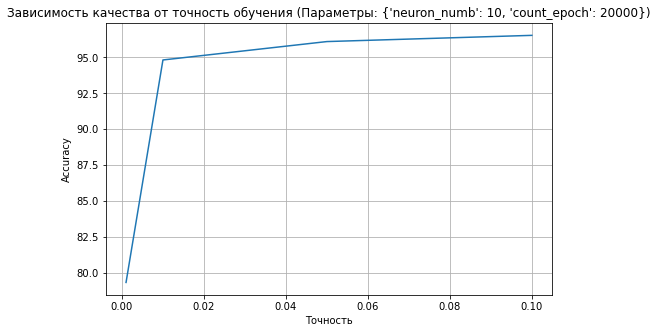

In [15]:
for key in analytics["learning_rates"]:
    learning_rate_analitic = analytics["learning_rates"][key]
    accuracies = learning_rate_analitic["accuracies"]
    params = learning_rate_analitic["params"]
    
    show_graph_by_accuracy(
        accuracies, 
        learning_rates, 
        "Точность", 
        f"Зависимость качества от точность обучения (Параметры: {params})"
    )

Виим аналогичную картину как и в предыдущем варианте, только тут при уменьшении точности в некоторых случаях резко возрастает качество обучения, в остальных вариантах уменьшения точности особого прироста не дает

**Теперь расмотрим как меняется качество в зависимости от количества эпох**

Каждый график показывает это изминение при разных мараметрах количества нейронов и точности обучения

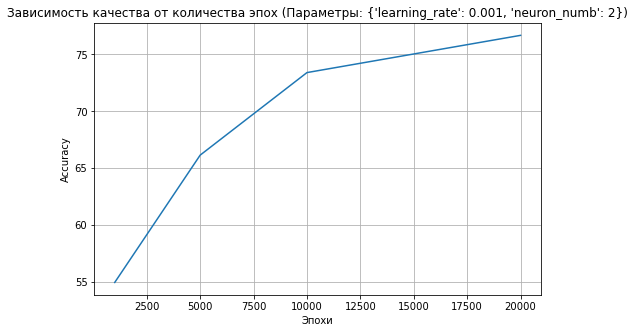

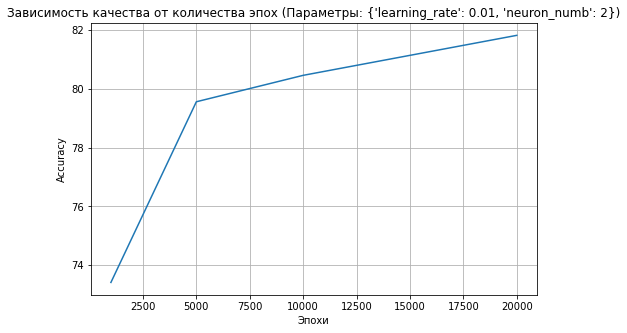

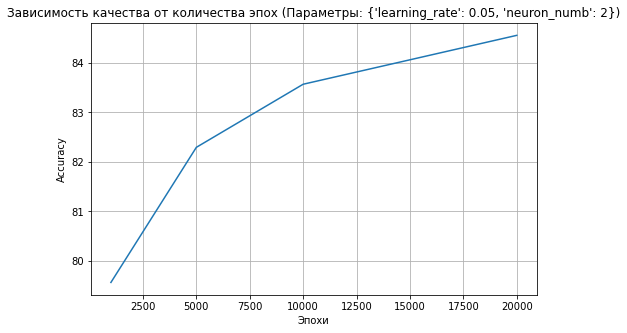

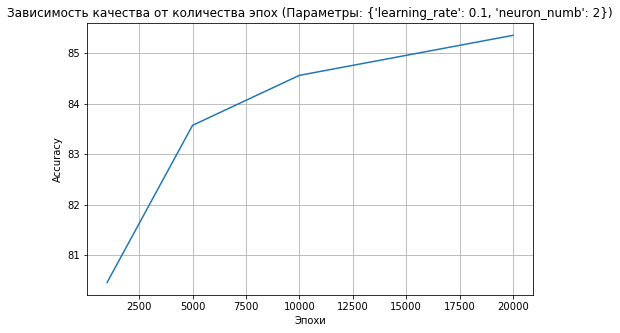

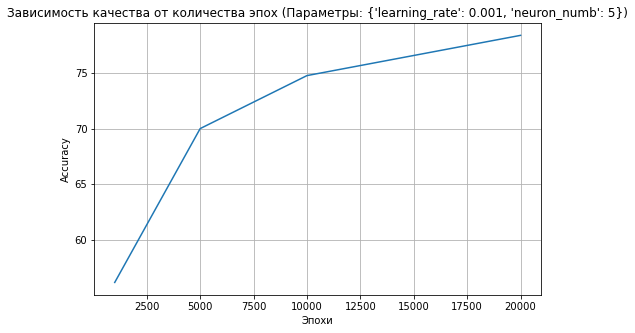

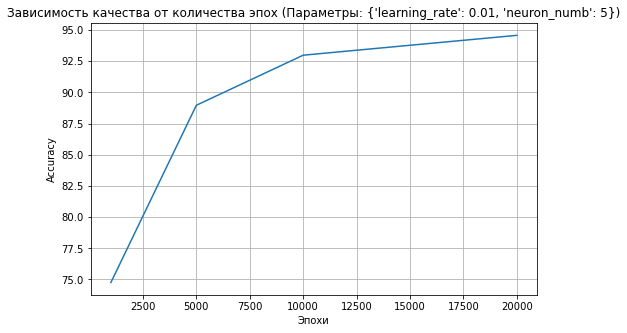

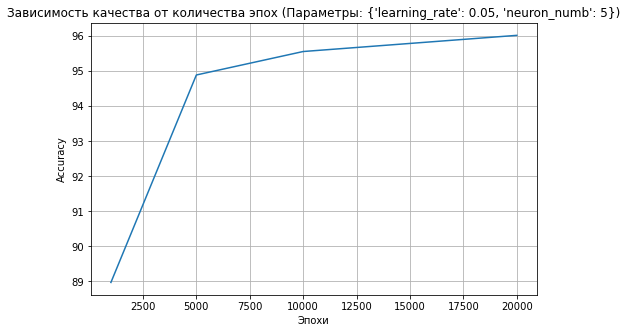

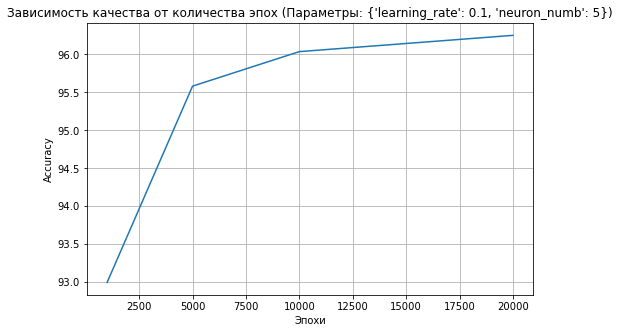

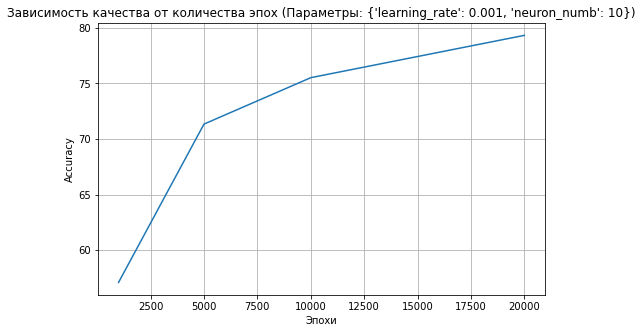

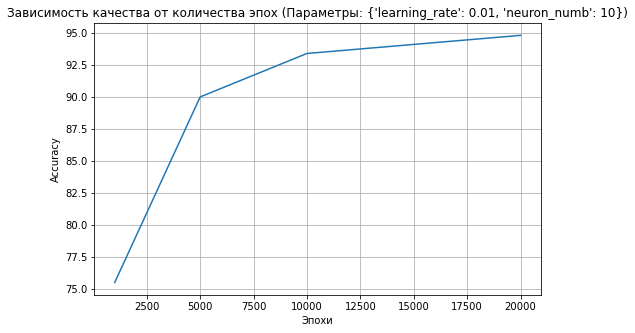

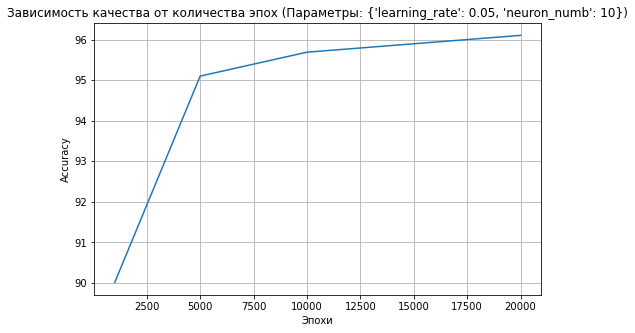

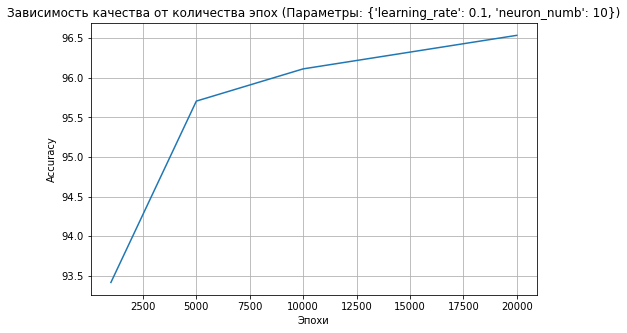

In [16]:
for key in analytics["count_epoсhs"]:
    count_epoсh_analitic = analytics["count_epoсhs"][key]
    accuracies = count_epoсh_analitic["accuracies"]
    params = count_epoсh_analitic["params"]
    
    show_graph_by_accuracy(
        accuracies, 
        count_epoсhs, 
        "Эпохи", 
        f"Зависимость качества от количества эпох (Параметры: {params})"
    )

В основном чем больше эпох тем лучше качество,  интесивность возрастания качества зависит от остальных параметров

In [17]:
print(f"Лучшая метрика: {best_accuracy}")
print(f"Лучшие параметры: {best_param}")

Лучшая метрика: 96.5360183359889
Лучшие параметры: {'neuron_numb': 10, 'learning_rate': 0.1, 'count_epoсh': 20000}
